# 실습코드(미세먼지 데이터)

- 에어코리아에 접속해서 2019년 4월의 전국 단위 미세먼지 측정치를 다운로드합니다.
- 다운로드 파일은 미리 올려드렸으니 'Y2019Q4' 파일을 로드하여 실습해봅시다!

In [1]:
import numpy as np
import pandas as pd

df= pd.read_csv("Y2019Q4.csv", header=0, engine='python') 

In [2]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2019040101,0.002,0.4,0.037,0.022,27.0,16.0,서울특별시 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019040102,0.003,0.4,0.037,0.021,25.0,15.0,서울특별시 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019040103,0.003,0.4,0.041,0.016,23.0,13.0,서울특별시 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019040104,0.002,0.5,0.030,0.025,22.0,12.0,서울특별시 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019040105,0.002,0.4,0.032,0.023,23.0,12.0,서울특별시 중구 덕수궁길 15


In [3]:
#df의 전체적인 정보를 조회해봅시다
df.shape

(314339, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314339 entries, 0 to 314338
Data columns (total 12 columns):
지역       314339 non-null object
망        314339 non-null object
측정소코드    314339 non-null int64
측정소명     314339 non-null object
측정일시     314339 non-null int64
SO2      301514 non-null float64
CO       300889 non-null float64
O3       302759 non-null float64
NO2      304334 non-null float64
PM10     302581 non-null float64
PM25     283965 non-null float64
주소       314339 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 28.8+ MB


In [5]:
#실전에서 칼럼네임이 한글이면 깨지는 경우가 많습니다. 영어로 변경해봅시다
df=df.rename(index=str, columns={'지역':"SGG","측정소코드":"id","측정소명":"id_name","측정일시":"date","주소":"add"})
df.head()

,SGG,망,id,id_name,date,SO2,CO,O3,NO2,PM10,PM25,add
0,서울 중구,도시대기,111121,중구,2019040101,0.002,0.4,0.037,0.022,27.0,16.0,서울특별시 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019040102,0.003,0.4,0.037,0.021,25.0,15.0,서울특별시 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019040103,0.003,0.4,0.041,0.016,23.0,13.0,서울특별시 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019040104,0.002,0.5,0.030,0.025,22.0,12.0,서울특별시 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019040105,0.002,0.4,0.032,0.023,23.0,12.0,서울특별시 중구 덕수궁길 15


In [6]:
#필요한 컬럼들만 뽑아냅시다(참고: PM10은 미세먼지, PM25는 초미세먼지를 의미)
cols=['SGG','id','date','SO2','CO','PM10','PM25']
df2=df[cols]
df2.tail()

,SGG,id,date,SO2,CO,PM10,PM25
314334,인천 옹진군,831492,2019043020,0.0017,0.2,16.0,12.0
314335,인천 옹진군,831492,2019043021,0.0013,0.2,19.0,10.0
314336,인천 옹진군,831492,2019043022,0.0012,0.2,21.0,9.0
314337,인천 옹진군,831492,2019043023,0.0010,0.2,21.0,15.0
314338,인천 옹진군,831492,2019043024,0.0010,0.2,22.0,11.0


In [7]:
#'date' 칼럼의 타입을 datetime으로 설정하고, 이를 인덱스로 설정해봅시다.
##'date'를 연-월-일 형식으로 바꿔봅시다. 마지막 2자리는 제외(마지막 2자리는 hour)
s_date=df2.date.astype(str)
s_date2=s_date.str[:-2]
df2['DATE']=pd.to_datetime(s_date2)
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SGG,id,date,SO2,CO,PM10,PM25,DATE
0,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0,2019-04-01
1,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0,2019-04-01
2,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0,2019-04-01
3,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0,2019-04-01
4,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0,2019-04-01


In [8]:
#새로운 칼럼인 'SIDO'를 만들어봅시다
df2['SIDO']=df2['SGG'].str[0:2]
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SGG,id,date,SO2,CO,PM10,PM25,DATE,SIDO
0,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0,2019-04-01,서울
1,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0,2019-04-01,서울
2,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0,2019-04-01,서울
3,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0,2019-04-01,서울
4,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0,2019-04-01,서울


In [9]:
#시도별 하루 초미세먼지의 평균을 구해봅시다
daily_mean=df2.groupby(['SIDO','DATE'])['PM25'].mean()
daily_mean.head(10)

SIDO  DATE      
강원    2019-04-01    17.067941
      2019-04-02    15.893082
      2019-04-03    19.614256
      2019-04-04    23.418860
      2019-04-05    24.406181
      2019-04-06    14.756250
      2019-04-07    13.703158
      2019-04-08    12.529412
      2019-04-09     9.227700
      2019-04-10     3.550898
Name: PM25, dtype: float64

In [10]:
#보기 쉽게, stack 메서드를 이용하여 표로 정리해봅시다(date/SIDO)
daily_mean2=daily_mean.unstack(level=0)
daily_mean2.head()

SIDO,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
DATE,,,,,,,,,,,,,,,,,
2019-04-01,17.067941,11.882521,11.736349,12.011905,10.507463,13.453333,11.235915,16.206406,12.218317,11.159574,12.423174,10.416136,9.448519,12.346975,11.962406,12.056061,14.772009
2019-04-02,15.893082,17.141889,13.584252,14.985981,17.039604,16.714660,14.191638,17.924429,16.965480,15.656250,16.115183,15.506383,14.303073,17.878472,21.302817,17.057269,21.241935
2019-04-03,19.614256,21.720133,14.018809,16.498818,17.114833,18.785340,18.409722,19.128521,22.645678,19.787234,18.025381,20.257732,14.295518,21.930070,11.616000,21.135521,23.615556
2019-04-04,23.418860,20.756563,18.759812,19.306977,26.160000,20.524804,21.125000,23.071304,20.144989,23.625000,21.713217,17.896000,18.571622,24.729965,12.298611,20.541007,27.035398
2019-04-05,24.406181,23.270219,26.727129,27.344340,31.466981,27.894309,27.947552,33.141361,24.087645,24.631579,32.083538,19.928571,30.678378,33.229021,40.812500,25.824561,28.355705


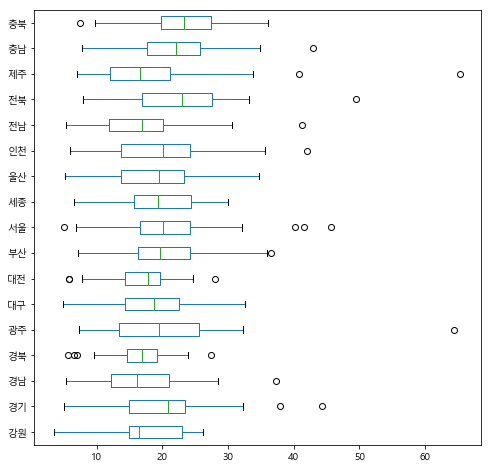

In [19]:
#시각화(참고)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font' , family=font_name); 

daily_mean2.plot(kind='box', vert=0, figsize=(8,8)) 
plt.show()

# Quest+Answer

1. 로드한 'df2'데이터프레임에는 결측치가 상당수 포함되어 있습니다. 
결측치를 확인하는 코드를 이용하여, 어떤 칼럼에 결측치가 얼마나 있는지 파악해보세요.
그리고, 'SO2','CO' 컬럼의 결측치는 그것의 평균값으로 채우고,
'PM10','PM25' 컬럼의 결측치는 모두 삭제하는 코드를 작성해주세요.

In [12]:
#결측치 확인
df2.isna().sum()

SGG         0
id          0
date        0
SO2     12825
CO      13450
PM10    11758
PM25    30374
DATE        0
SIDO        0
dtype: int64

In [13]:
#결측치가 있는 칼럼인 'SO2','CO'는 평균값으로 채워봅시다.
df2['SO2']=df2['SO2'].fillna(df2['SO2'].mean())
df2['CO']=df2['CO'].fillna(df2['CO'].mean())
df2.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


SGG         0
id          0
date        0
SO2         0
CO          0
PM10    11758
PM25    30374
DATE        0
SIDO        0
dtype: int64

In [14]:
df2=df2.dropna(how='any')
df2.isna().sum()

SGG     0
id      0
date    0
SO2     0
CO      0
PM10    0
PM25    0
DATE    0
SIDO    0
dtype: int64

In [15]:
#참고) dropna는 NaN가 하나라도 있는 행을 전부 지웁니다. 지우고자 하는 컬럼을 선택하고 싶으면 notnull()을 쓰면 좋아요
#df2=df2[df2['PM25'].notnull()]
#df2=df2[df2['PM10'].notnull()]
#df2.isna().sum()

2. df2의 'date' 칼럼은 '2018030509'와 같이 '연+월+일+시'로 되어 있습니다.
우리는 여기서 연+월+일만 슬라이싱해 datetime형태로 date를 다시 정의했었죠?(ex. 2018-03-05)
마찬가지로, 이번엔 '시'만 슬라이싱해 df2의 새로운 칼럼인 'hour' 칼럼을 만들어주세요.(ex. 09)

In [16]:
#답(df2의 'date'드랍시키기 전에 해야 함, 'DATE' 인덱스 설정된 것 리셋시키기)
df2['hour']=s_date.str[-2:]
df2.head()

,SGG,id,date,SO2,CO,PM10,PM25,DATE,SIDO,hour
0,서울 중구,111121,2019040101,0.002,0.4,27.0,16.0,2019-04-01,서울,01
1,서울 중구,111121,2019040102,0.003,0.4,25.0,15.0,2019-04-01,서울,02
2,서울 중구,111121,2019040103,0.003,0.4,23.0,13.0,2019-04-01,서울,03
3,서울 중구,111121,2019040104,0.002,0.5,22.0,12.0,2019-04-01,서울,04
4,서울 중구,111121,2019040105,0.002,0.4,23.0,12.0,2019-04-01,서울,05


3. 미세먼지가 나쁜 기준은 초미세먼지('PM25')가 35보다 크면 '나쁨'으로 분류한다고 합니다.
불린 인덱싱과, 위의 2번에서 만든 'hour' 칼럼을 이용하여, 
시군구(SGG)별로 PM25가 35보다 큰 시간들을 카운트하고,
초미세먼지가 35보다 큰 개수가 많은 시군구와 그 시간대가 언제인지 sorting하여 구해주세요.

In [17]:
#답
bad_hours=df2[df2.PM25>35].groupby(['SGG','hour'])['PM25'].count()
bad_hours.head(15)

SGG  hour
강원   01      6
     02      6
     03      5
     04      4
     05      1
     06      4
     07      3
     08      2
     09      5
     10      2
     12      2
     13      1
     17      1
     18      2
     19      2
Name: PM25, dtype: int64

In [18]:
bad_hours.sort_values(ascending=False) #답은 경기 부천시, 오전 9시와 10시에 가장 많이 초미세먼지 '나쁨'이 관측되었네요.

SGG      hour
경기 부천시   10      68
         09      68
         08      61
충북 청주시   10      55
경기 부천시   11      54
         07      53
충북 청주시   09      51
충남 아산시   10      50
경기 부천시   06      50
         05      50
         02      48
경기 화성시   09      48
경기 부천시   03      48
충남 아산시   09      47
경기 부천시   04      47
         24      47
전북 익산시   10      47
경기 부천시   01      46
경기 시흥시   09      46
충북 청주시   08      45
경남 창원시   09      44
충남 아산시   11      44
경기 부천시   12      44
전북 익산시   09      43
경기 화성시   10      43
경기 고양시   10      43
충남 아산시   08      43
경기 시흥시   08      42
경기 평택시   09      42
경기 부천시   13      42
                 ..
경남 함양군   18       1
         20       1
         21       1
경북       11       1
경북 경산시   10       1
경남 사천시   10       1
경북 경산시   17       1
경북 경주시   08       1
         11       1
         13       1
         14       1
         23       1
경남 함양군   07       1
경남 함안군   07       1
경남 하동군   24       1
         23       1
         22       1
         21       1
      